# Monitoring vulcano eruption at Nyamulagira  near Goma, Kongo. May 2021

The city of Goma in the eastern part of the Democratic Republic of Congo has experieced in May 2021 a nearby volcano eruption. Movements of magma at shallow depths towards the central crater of Nyamulagira, referring to the local mountain. The Nyiragongo volcano erupted, forcing the people Goma to flee to the Rubavu region of Rwanda and other cities in the DRC. An earthquake affected both Rwanda and the DRC after the volcano erupted.


In [3]:
import xarray as xr
import numpy as np

import os
from glob import glob

import rasterio as rio
from datetime import datetime

from eodag import EODataAccessGateway, setup_logging

import matplotlib.pyplot as plt
import matplotlib.colors

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

Set up working directory

In [4]:
workspace = "/home/eoafrica/Products/downloads/kongo"
if not os.path.isdir(workspace):
    os.mkdir(workspace)

Configured eodag to download products in this workspace directory.

In [5]:
workspace

'/home/eoafrica/Products/downloads/kongo'

In [6]:
os.environ["EODAG__PEPS__DOWNLOAD__OUTPUTS_PREFIX"] = os.path.abspath(workspace)

In [7]:
start_dt="2021-05-02"
end_dt ="2021-06-08"

In [8]:
setup_logging(0)  # 0: nothing, 1: only progress bars, 2: INFO, 3: DEBUG

dag = EODataAccessGateway()
geometry = "POLYGON ((29.132996 -1.709601, 29.132996 -1.424063, 29.270325 -1.424063, 29.270325 -1.709601, 29.132996 -1.709601))"
search_results, total_count = dag.search(
    productType="S2_MSI_L1C",
    geom=geometry,
    start=start_dt,
    end=end_dt,
)

Downloading all products

In [9]:
search_results

SearchResult([EOProduct(id=S2B_MSIL1C_20210502T080559_N0500_R078_T35MQU_20230206T155133, provider=creodias_s3),
              EOProduct(id=S2B_MSIL1C_20210522T080609_N0300_R078_T35MQU_20210522T101242, provider=creodias_s3),
              EOProduct(id=S2B_MSIL1C_20210502T080559_N0300_R078_T35MQU_20210502T100438, provider=creodias_s3),
              EOProduct(id=S2A_MSIL1C_20210527T080611_N0300_R078_T35MQU_20210527T093107, provider=creodias_s3),
              EOProduct(id=S2A_MSIL1C_20210507T080611_N0300_R078_T35MQU_20210507T094054, provider=creodias_s3),
              EOProduct(id=S2B_MSIL1C_20210512T080609_N0300_R078_T35MQU_20210512T100153, provider=creodias_s3),
              EOProduct(id=S2B_MSIL1C_20210512T080609_N0500_R078_T35MQU_20230209T100143, provider=creodias_s3),
              EOProduct(id=S2A_MSIL1C_20210517T080611_N0300_R078_T35MQU_20210517T092950, provider=creodias_s3),
              EOProduct(id=S2A_MSIL1C_20210507T080611_N0500_R078_T35MQU_20230602T183036, provider=creodi

In [10]:
setup_logging(0) 
dag.download_all(search_results)

['/tmp/S2B_MSIL1C_20210502T080559_N0500_R078_T35MQU_20230206T155133',
 '/tmp/S2B_MSIL1C_20210502T080559_N0300_R078_T35MQU_20210502T100438',
 '/tmp/S2A_MSIL1C_20210507T080611_N0300_R078_T35MQU_20210507T094054',
 '/tmp/S2B_MSIL1C_20210512T080609_N0500_R078_T35MQU_20230209T100143',
 '/tmp/S2A_MSIL1C_20210507T080611_N0500_R078_T35MQU_20230602T183036',
 '/tmp/S2B_MSIL1C_20210522T080609_N0500_R078_T35MQU_20230224T205632',
 '/tmp/S2B_MSIL1C_20210601T080609_N0300_R078_T35MQU_20210601T100544',
 '/tmp/S2B_MSIL1C_20210601T080609_N0500_R078_T35MQU_20230129T023529',
 '/tmp/S2B_MSIL1C_20210522T080609_N0300_R078_T35MQU_20210522T101242',
 '/tmp/S2B_MSIL1C_20210512T080609_N0300_R078_T35MQU_20210512T100153',
 '/tmp/S2A_MSIL1C_20210517T080611_N0500_R078_T35MQU_20230223T031527',
 '/tmp/S2A_MSIL1C_20210606T080611_N0300_R078_T35MQU_20210606T093536',
 '/tmp/S2A_MSIL1C_20210527T080611_N0300_R078_T35MQU_20210527T093107',
 '/tmp/S2A_MSIL1C_20210527T080611_N0500_R078_T35MQU_20230228T123421',
 '/tmp/S2A_MSIL1C_20

Shift the data to workspace = "/home/eoafrica/Products/downloads/aethiopien"

Saving data to file

In [11]:

for result in search_results:
    product_name = result.properties['title']
    s2_dir = "/tmp/" + product_name

    tci_files = glob(s2_dir + "/GRANULE/*/IMG_DATA/*.jp2")

    # Move files to the destination 
    for file_path in tci_files:
        if not os.path.exists(os.path.join(workspace, os.path.basename(file_path))):
            shutil.move(file_path, workspace)
            #print(f"File moved successfully: {file_path} to {workspace}")
        else:
            print(f"Error: Destination directory aleardy exists: {os.path.basename(file_path)}")

# additional: Remove the empty source directory
# shutil.rmtree("/tmp/" + product_name)


Error: Destination directory aleardy exists: T35MQU_20210502T080559_B08.jp2
Error: Destination directory aleardy exists: T35MQU_20210502T080559_B11.jp2
Error: Destination directory aleardy exists: T35MQU_20210502T080559_B07.jp2
Error: Destination directory aleardy exists: T35MQU_20210502T080559_B01.jp2
Error: Destination directory aleardy exists: T35MQU_20210502T080559_TCI.jp2
Error: Destination directory aleardy exists: T35MQU_20210502T080559_B06.jp2
Error: Destination directory aleardy exists: T35MQU_20210502T080559_B03.jp2
Error: Destination directory aleardy exists: T35MQU_20210502T080559_B12.jp2
Error: Destination directory aleardy exists: T35MQU_20210502T080559_B09.jp2
Error: Destination directory aleardy exists: T35MQU_20210502T080559_B02.jp2
Error: Destination directory aleardy exists: T35MQU_20210502T080559_B10.jp2
Error: Destination directory aleardy exists: T35MQU_20210502T080559_B04.jp2
Error: Destination directory aleardy exists: T35MQU_20210502T080559_B8A.jp2
Error: Desti

We quickly sort the results by date to plot the images before the fire first and the images after the fire last.

While doing so, we already use the library rasterio to read the image into a numpy array.

Since matplotlib expects the z-axis that represents the image bands (red, green and blue) to be the first dimension, we need to re-arrange the dimensions before plotting the images by using numpy.transpose.

Only transpose the images between the time frame close to the event
Also calculate the SWIR

In [12]:
def reproject_band(src, dst_shape, src_crs):
    """
    Reproject a band to the specified shape.

    Parameters:
    - src: Rasterio dataset for the source band.
    - dst_shape: Tuple specifying the desired shape (height, width) of the destination band.
    - src_crs: Source coordinate reference system.
    Returns:
    - Reprojected band as a NumPy array.
    """
    band_array = np.zeros(dst_shape, dtype=src.read(1).dtype)
    rio.warp.reproject(
        source=src.read(1),
        destination=band_array,
        src_transform=src.transform,
        src_crs=src_crs,
        dst_crs=src_crs,
        dst_transform=from_origin(src.bounds.left, src.bounds.top, *dst_shape),
        resampling=Resampling.bilinear
    )
    return band_array


In [13]:
from datetime import datetime
from rasterio.transform import from_origin
from rasterio.enums import Resampling

start_date = datetime.strptime('2021-05-02', '%Y-%m-%d')
end_date = datetime.strptime('2021-06-02', '%Y-%m-%d')

search_results_kv_tci = {}
search_results_kv_swir = {}
search_results_kv_nbr = {}

for result in search_results:
    publication_date_str = result.properties.get("publicationDate", "")
    publication_date = datetime.strptime(publication_date_str, '%Y-%m-%dT%H:%M:%S.%fZ')
    
    # Checking publication date is within the specified range
    if start_date <= publication_date <= end_date:
        print(publication_date.strftime('%Y%m%d'))
        if glob(os.path.join(workspace, f"*_{publication_date.strftime('%Y%m%d')}*TCI.jp2")): 
            tci = glob(os.path.join(workspace, f"*_{publication_date.strftime('%Y%m%d')}*TCI.jp2"))[0]
            print(f"Calculating TCI: {result}")
            with rio.open(tci) as src:
                tci_array = src.read()
            transposed_tci = np.transpose(tci_array, (1, 2, 0))
            search_results_kv_tci[result.properties["publicationDate"]] = transposed_tci
            
        # calculate the SWIR:
        if glob(os.path.join(workspace, f"*_{publication_date.strftime('%Y%m%d')}*B8A.jp2")):
            band8a = glob(os.path.join(workspace, f"*_{publication_date.strftime('%Y%m%d')}*B8A.jp2"))[0]
            band4 = glob(os.path.join(workspace, f"*_{publication_date.strftime('%Y%m%d')}*B04.jp2"))[0]
            band12 = glob(os.path.join(workspace, f"*_{publication_date.strftime('%Y%m%d')}*B12.jp2"))[0]
            dst_shape = (5490, 5490)  # Replace this with your desired shape   
            print(f"Calculating SWIR: {result}")
            with rio.open(band8a) as src:
                src_crs = src.crs
                band8a_array = reproject_band(src, dst_shape, src_crs)
            with rio.open(band4) as src:
                src_crs = src.crs
                band4_array = reproject_band(src, dst_shape, src_crs)
            with rio.open(band12) as src:
                src_crs = src.crs
                band12_array = reproject_band(src, dst_shape, src_crs)

            # Transpose the bands
            swir = np.transpose(np.stack([band8a_array, band4_array, band12_array], axis=-1), (1, 2, 0))
            # Calculate SWIR as the sum of bands 8A and 12
           
            #swir = transposed_bands[:, :, 0] + transposed_bands[:, :, 2]
            search_results_kv_swir[result.properties["publicationDate"]] = swir
            
            # Calculate the NBR manually: NBR = (B8 - B12) / (B8 + B12)
            print(f"Calculating NBR: {result}")
            band8 = glob(os.path.join(workspace, f"*_{publication_date.strftime('%Y%m%d')}*B08.jp2"))[0]
            with rio.open(band8) as src:
                src_crs = src.crs
                band8_array = reproject_band(src, dst_shape, src_crs)
            band12_array = band12_array.astype(int)
            band8_array = band8_array.astype(int)
            print(band8_array.shape)
            print(band12_array.shape)
            nbr = (band8_array - band12_array) / (band8_array + band12_array)
            search_results_kv_nbr[result.properties["publicationDate"]] = nbr
            

20210522
Calculating TCI: EOProduct(id=S2B_MSIL1C_20210522T080609_N0300_R078_T35MQU_20210522T101242, provider=creodias_s3)
Calculating SWIR: EOProduct(id=S2B_MSIL1C_20210522T080609_N0300_R078_T35MQU_20210522T101242, provider=creodias_s3)
Calculating NBR: EOProduct(id=S2B_MSIL1C_20210522T080609_N0300_R078_T35MQU_20210522T101242, provider=creodias_s3)
(5490, 5490)
(5490, 5490)
20210502
Calculating TCI: EOProduct(id=S2B_MSIL1C_20210502T080559_N0300_R078_T35MQU_20210502T100438, provider=creodias_s3)
Calculating SWIR: EOProduct(id=S2B_MSIL1C_20210502T080559_N0300_R078_T35MQU_20210502T100438, provider=creodias_s3)
Calculating NBR: EOProduct(id=S2B_MSIL1C_20210502T080559_N0300_R078_T35MQU_20210502T100438, provider=creodias_s3)
(5490, 5490)
(5490, 5490)
20210527
Calculating TCI: EOProduct(id=S2A_MSIL1C_20210527T080611_N0300_R078_T35MQU_20210527T093107, provider=creodias_s3)
Calculating SWIR: EOProduct(id=S2A_MSIL1C_20210527T080611_N0300_R078_T35MQU_20210527T093107, provider=creodias_s3)
Calcul

In [14]:
search_results_kv_tci

{'2021-05-22T14:22:29.562Z': array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 24,  38,  52],
         [ 24,  38,  53],
         [ 25,  39,  52]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 24,  38,  52],
         [ 25,  39,  53],
         [ 25,  40,  52]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 25,  38,  52],
         [ 25,  39,  53],
         [ 24,  40,  52]],
 
        ...,
 
        [[202, 214, 224],
         [194, 204, 215],
         [182, 194, 204],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[206, 216, 226],
         [196, 205, 218],
         [187, 198, 210],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[215, 221, 229],
         [202, 210, 218],
         [199, 205, 213],
         ...,


NBR = (NIR-SWIR)/(NIR+SWIR)
The Normalized Burn Ratio calculation is used to highlight burned areas and to estimate severity of fire. Burned areas reflect high in shortwave infrared (SWIR) and low in near infrared (NIR) and will therefore have a low NBR value. Similar to NDVI, healthy vegetation will have a high NBR value. The band numbers (B8, B12) are based on Sentinel 2 MSI band designations, but the formula may be used for any imagery by specifying the NIR band as B4 and the SWIR band as B6 in the subsequent dialog.

NBRI (Sentinel 2 MSI): NIR=B8, SWIR/Thermal=B12

In [15]:
search_results_kv_nbr

{'2021-05-22T14:22:29.562Z': array([[0.43283582, 0.66593727, 0.47932517, ...,        nan,        nan,
                nan],
        [0.20118899, 0.22317843, 0.27332877, ...,        nan,        nan,
                nan],
        [0.28707743, 0.28425861, 0.57253821, ...,        nan,        nan,
                nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan]]),
 '2021-05-02T13:57:11.227Z': array([[0.40496442, 0.37423521, 0.35710977, ...,        nan,        nan,
                nan],
        [0.43913258, 0.40211374, 0.33828644, ...,        nan,        nan,
                nan],
        [0.433926  , 0.4207405 , 0.40225443, ...,        nan,        nan,
                nan],
        ...,
        [       nan,        nan,        nan, ...,   

Skipping 2021-05-02T13:57:11.227Z due to to many cloudy pixels.
Skipping 2021-05-07T15:47:48.832Z due to to many cloudy pixels.


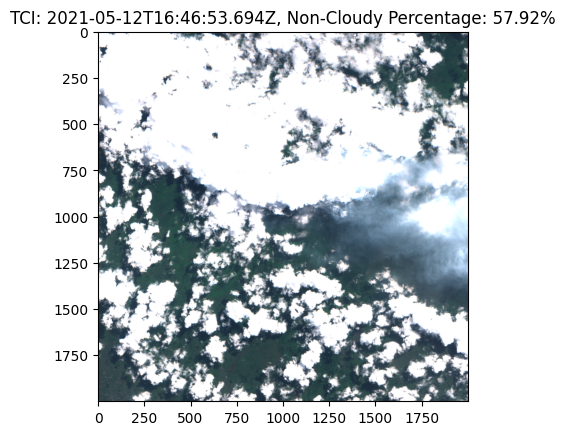

Skipping 2021-05-22T14:22:29.562Z due to to many cloudy pixels.


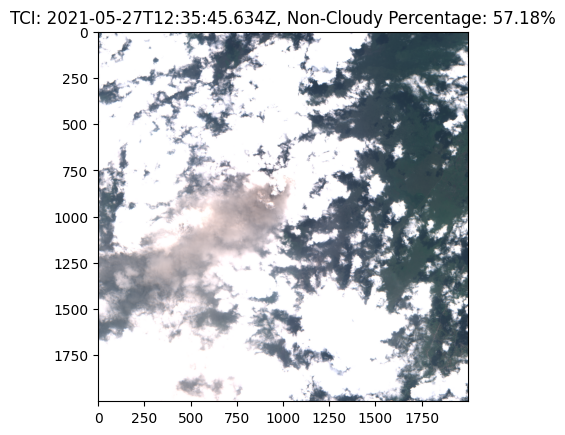

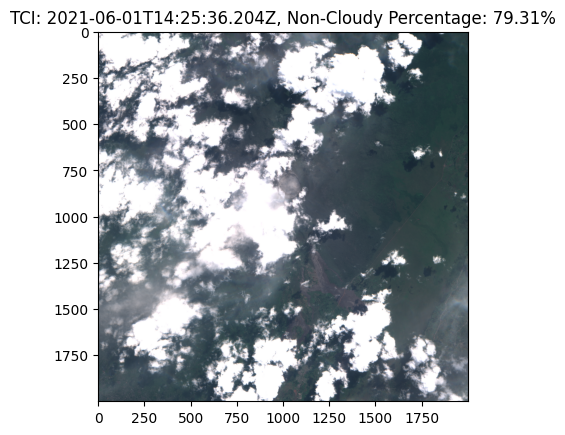

In [16]:
search_results_kv_tci_cloud_free = {}
threshold = 0.55  # Minimum percentage of non-cloudy pixels
for date, array in sorted(search_results_kv_tci.items()):
    roi = array[6000:8000, 4000:6000]
    # percentage of non-cloudy pixels
    non_cloudy_percentage = np.sum(roi != 255) / roi.size

    # Checking if the non-cloudy percentage meets the threshold
    if non_cloudy_percentage >= threshold:
        plt.imshow(roi)
        plt.title(f'TCI: {date}, Non-Cloudy Percentage: {non_cloudy_percentage:.2%}')
        plt.show()
        search_results_kv_tci_cloud_free[date] = roi
    else:
        print(f"Skipping {date} due to to many cloudy pixels.")


[[0.43283582 0.66593727 0.47932517 ...        nan        nan        nan]
 [0.20118899 0.22317843 0.27332877 ...        nan        nan        nan]
 [0.28707743 0.28425861 0.57253821 ...        nan        nan        nan]
 ...
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]
[[0.40496442 0.37423521 0.35710977 ...        nan        nan        nan]
 [0.43913258 0.40211374 0.33828644 ...        nan        nan        nan]
 [0.433926   0.4207405  0.40225443 ...        nan        nan        nan]
 ...
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]
[[0.61123228 0.31914894 0.14183722 ...        nan        nan        nan]
 [0.50238777 0.63966771 0.5855936  ... 

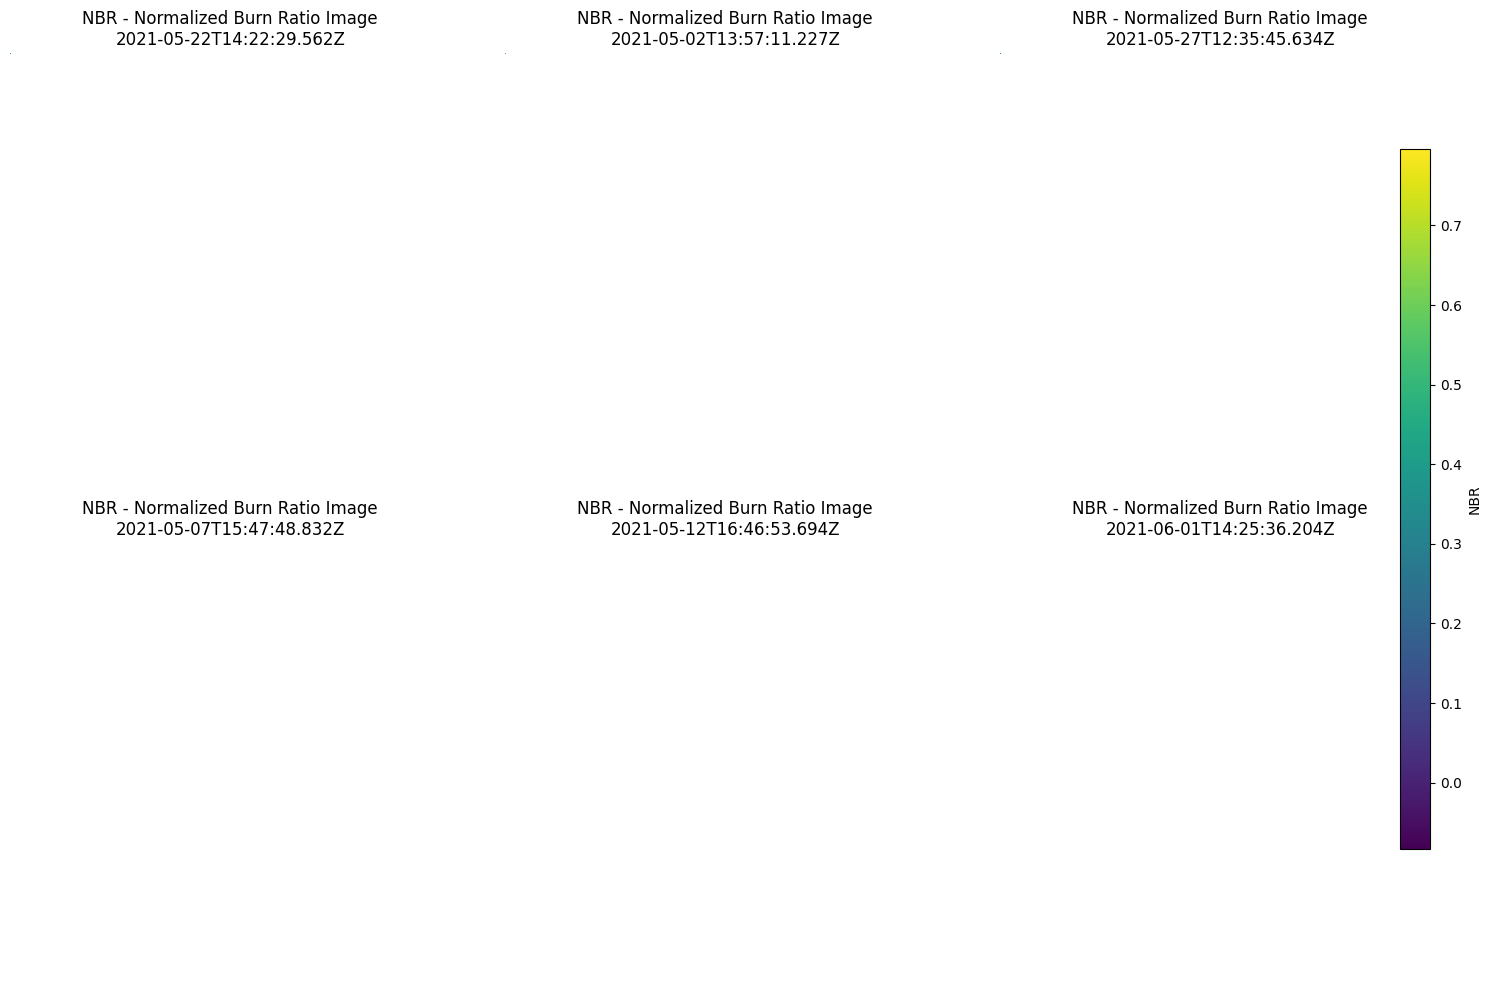

In [17]:
# Set up the subplots
num_images = len(search_results_kv_nbr)
num_cols = 3  # Adjust the number of columns based on your preference
num_rows = (num_images + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Iterate over the dates and corresponding NBR images
for i, (date, nbr_image) in enumerate(search_results_kv_nbr.items()):
    ax = axes[i]
    #nbr_normalized = (array - np.min(array)) / (np.max(array) - np.min(array))
    # Mask nan values
    masked_nbr_image = np.ma.masked_where(np.isnan(nbr_image), nbr_image)
    im = ax.imshow(masked_nbr_image)#, cmap='PiYG', vmin=-1, vmax=1)
    print(nbr_image)
    ax.set_title(f"NBR - Normalized Burn Ratio Image\n{date}")
    ax.axis('off')

# Add a colorbar
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])  # Adjust the position and size as needed
fig.colorbar(im, cax=cbar_ax, orientation='vertical', label='NBR')

plt.tight_layout()
plt.show()

Extract the two cloud free images

In [18]:
search_results_kv_tci_cloud_free.keys()

dict_keys(['2021-05-12T16:46:53.694Z', '2021-05-27T12:35:45.634Z', '2021-06-01T14:25:36.204Z'])

In [19]:
image1 = search_results_kv_tci_cloud_free['2021-05-12T16:46:53.694Z']  # before the event
image2 = search_results_kv_tci_cloud_free['2021-05-27T12:35:45.634Z']  # event day - vulcano eruption
image3 = search_results_kv_tci_cloud_free['2021-06-01T14:25:36.204Z']  # day after the event

Calculate the flooded extent while comparing the two cloud free images

Calculate the absolute difference between the two images

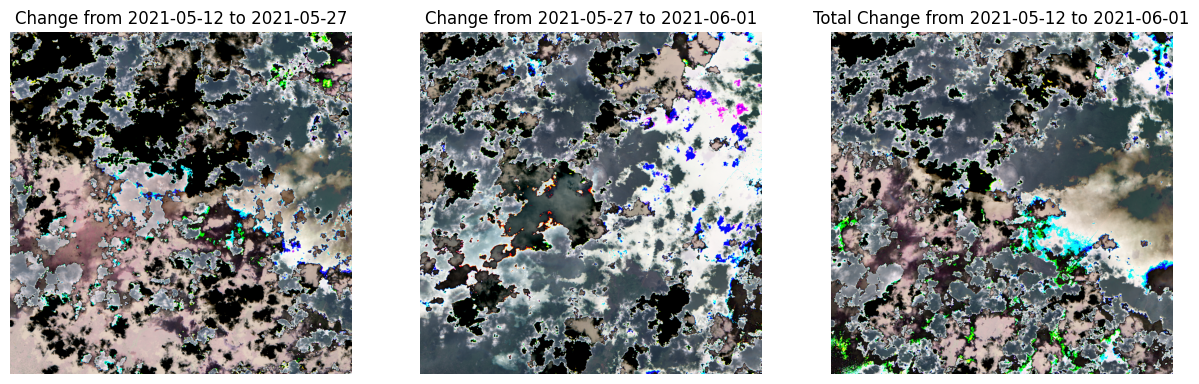

In [20]:
# differencing to highlight changes
diff1 = np.abs(image2 - image1)
diff2 = np.abs(image3 - image2)
diff3 = np.abs(image3 - image1)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, diff, date in zip(axes, [diff1, diff2, diff3], ['Change from 2021-05-12 to 2021-05-27', 'Change from 2021-05-27 to 2021-06-01', 'Total Change from 2021-05-12 to 2021-06-01']):
    ax.imshow(diff, cmap='viridis') 
    ax.set_title(date)
    ax.axis('off')

plt.show()

In [21]:
image1 = search_results_kv_nbr['2021-05-12T16:46:53.694Z']  # before the event
image2 = search_results_kv_nbr['2021-05-27T12:35:45.634Z']  # event day - vulcano eruption
image3 = search_results_kv_nbr['2021-06-01T14:25:36.204Z']  # day after the event

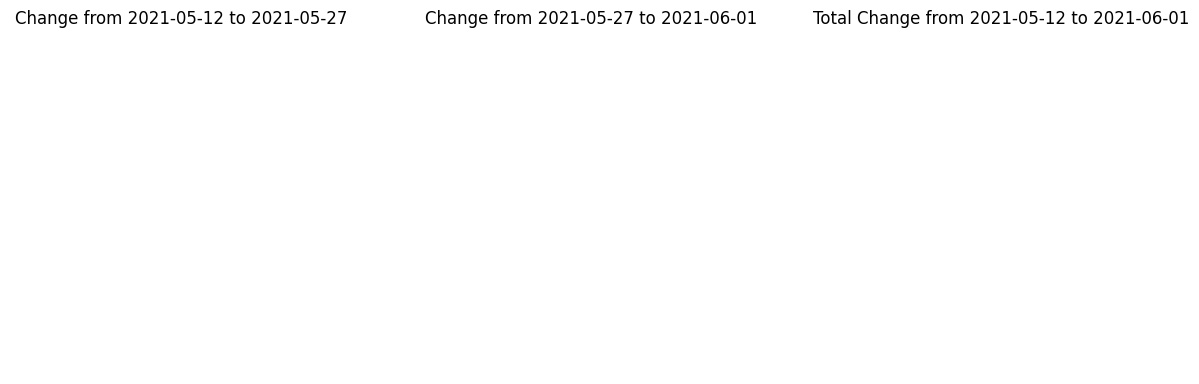

In [22]:
# differencing to highlight changes
diff1 = np.abs(image2 - image1)
diff2 = np.abs(image3 - image2)
diff3 = np.abs(image3 - image1)
cmap = matplotlib.colors.ListedColormap(['green','yellow','orange','red','purple'])
cmap.set_over('purple')
cmap.set_under('white')
bounds = [-0.5, 0.1, 0.27, 0.440, 0.660, 1.3]        
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, diff, date in zip(axes, [diff1, diff2, diff3], ['Change from 2021-05-12 to 2021-05-27', 'Change from 2021-05-27 to 2021-06-01', 'Total Change from 2021-05-12 to 2021-06-01']):
    ax.imshow(diff, cmap=cmap, norm = norm) 
    ax.set_title(date)
    ax.axis('off')

plt.show()

## Anaylsis with S1

Since there are so many clouds, an analysis with SAR data would be more sufficient 

In [8]:
setup_logging(2)  # 0: nothing, 1: only progress bars, 2: INFO, 3: DEBUG

dag = EODataAccessGateway()
geometry = "POLYGON ((29.132996 -1.709601, 29.132996 -1.424063, 29.270325 -1.424063, 29.270325 -1.709601, 29.132996 -1.709601))"
search_results_s1, total_count = dag.search(
    productType="S1_SAR_GRD",
    geom=geometry,
    start=start_dt,
    end=end_dt,
)

2023-12-14 09:40:28,226 eodag.config                     [INFO    ] Loading user configuration from: /home/eoafrica/.config/eodag/eodag.yml
2023-12-14 09:40:28,389 eodag.core                       [INFO    ] usgs: provider needing auth for search has been pruned because no crendentials could be found
2023-12-14 09:40:28,391 eodag.core                       [INFO    ] aws_eos: provider needing auth for search has been pruned because no crendentials could be found
2023-12-14 09:40:28,391 eodag.core                       [INFO    ] meteoblue: provider needing auth for search has been pruned because no crendentials could be found
2023-12-14 09:40:28,392 eodag.core                       [INFO    ] hydroweb_next: provider needing auth for search has been pruned because no crendentials could be found
2023-12-14 09:40:28,652 eodag.core                       [INFO    ] Locations configuration loaded from /home/eoafrica/.config/eodag/locations.yml
2023-12-14 09:40:28,688 eodag.core              

In [9]:
sorted_search_results_s1 = sorted(search_results_s1, key=lambda x: datetime.strptime(x.properties.get("publicationDate", ""), '%Y-%m-%dT%H:%M:%S.%fZ'))
sorted_search_results_s1

[EOProduct(id=S1B_IW_GRDH_1SDV_20210507T162007_20210507T162032_026800_03339D_A0B5, provider=creodias_s3),
 EOProduct(id=S1B_IW_GRDH_1SDV_20210507T162032_20210507T162103_026800_03339D_C6A2, provider=creodias_s3),
 EOProduct(id=S1B_IW_GRDH_1SDV_20210509T034431_20210509T034456_026822_033442_3ED7, provider=creodias_s3),
 EOProduct(id=S1A_IW_GRDH_1SDV_20210513T162109_20210513T162134_037871_04783E_6A8D, provider=creodias_s3),
 EOProduct(id=S1B_IW_GRDH_1SDV_20210519T162007_20210519T162032_026975_03390E_B9F2, provider=creodias_s3),
 EOProduct(id=S1B_IW_GRDH_1SDV_20210519T162032_20210519T162103_026975_03390E_464F, provider=creodias_s3),
 EOProduct(id=S1B_IW_GRDH_1SDV_20210521T034431_20210521T034456_026997_0339AB_9402, provider=creodias_s3),
 EOProduct(id=S1A_IW_GRDH_1SDV_20210525T162110_20210525T162135_038046_047D88_7283, provider=creodias_s3),
 EOProduct(id=S1A_IW_GRDH_1SDV_20210527T034526_20210527T034555_038068_047E2D_7C16, provider=creodias_s3),
 EOProduct(id=S1B_IW_GRDH_1SDV_20210531T162008

In [10]:
setup_logging(0) 
dag.download_all(sorted_search_results_s1)

['/tmp/S1B_IW_GRDH_1SDV_20210507T162007_20210507T162032_026800_03339D_A0B5',
 '/tmp/S1B_IW_GRDH_1SDV_20210509T034431_20210509T034456_026822_033442_3ED7',
 '/tmp/S1B_IW_GRDH_1SDV_20210519T162007_20210519T162032_026975_03390E_B9F2',
 '/tmp/S1B_IW_GRDH_1SDV_20210521T034431_20210521T034456_026997_0339AB_9402',
 '/tmp/S1A_IW_GRDH_1SDV_20210527T034526_20210527T034555_038068_047E2D_7C16',
 '/tmp/S1B_IW_GRDH_1SDV_20210531T162033_20210531T162104_027150_033E41_095D',
 '/tmp/S1B_IW_GRDH_1SDV_20210602T034446_20210602T034511_027172_033EDC_65DE',
 '/tmp/S1B_IW_GRDH_1SDV_20210507T162032_20210507T162103_026800_03339D_C6A2',
 '/tmp/S1B_IW_GRDH_1SDV_20210519T162032_20210519T162103_026975_03390E_464F',
 '/tmp/S1B_IW_GRDH_1SDV_20210531T162008_20210531T162033_027150_033E41_6FE0',
 '/tmp/S1A_IW_GRDH_1SDV_20210606T162110_20210606T162135_038221_0482BF_E09F',
 '/tmp/S1A_IW_GRDH_1SDV_20210513T162109_20210513T162134_037871_04783E_6A8D',
 '/tmp/S1B_IW_GRDH_1SDV_20210602T034421_20210602T034446_027172_033EDC_9BDC',

Getting S1 VH files, Plotting the data and zooming to the event

/tmp/S1A_IW_GRDH_1SDV_20210513T162109_20210513T162134_037871_04783E_6A8D/measurement/s1a-iw-grd-vh-20210513t162109-20210513t162134-037871-04783e-002.tiff
(1, 16826, 25377)


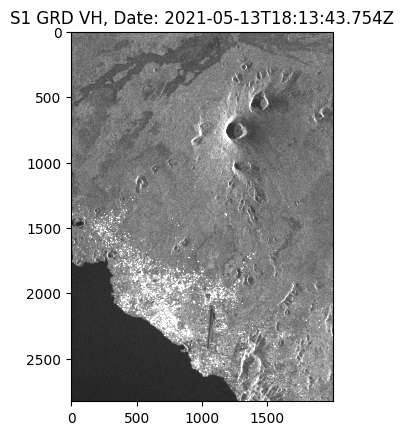

/tmp/S1A_IW_GRDH_1SDV_20210525T162110_20210525T162135_038046_047D88_7283/measurement/s1a-iw-grd-vh-20210525t162110-20210525t162135-038046-047d88-002.tiff
(1, 16826, 25376)


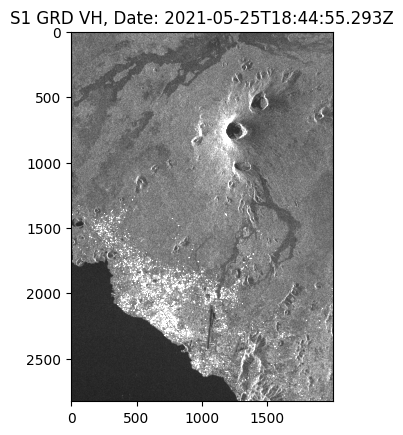

/tmp/S1A_IW_GRDH_1SDV_20210527T034526_20210527T034555_038068_047E2D_7C16/measurement/s1a-iw-grd-vh-20210527t034526-20210527t034555-038068-047e2d-002.tiff
(1, 19541, 25368)


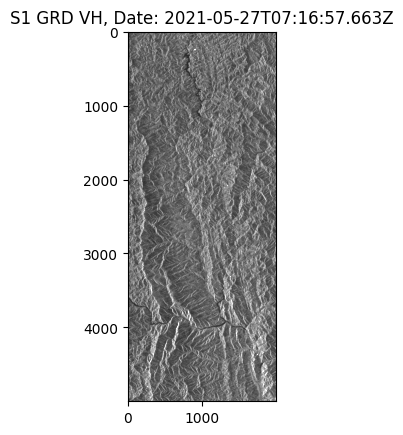

/tmp/S1A_IW_GRDH_1SDV_20210606T162110_20210606T162135_038221_0482BF_E09F/measurement/s1a-iw-grd-vh-20210606t162110-20210606t162135-038221-0482bf-002.tiff
(1, 16827, 25376)


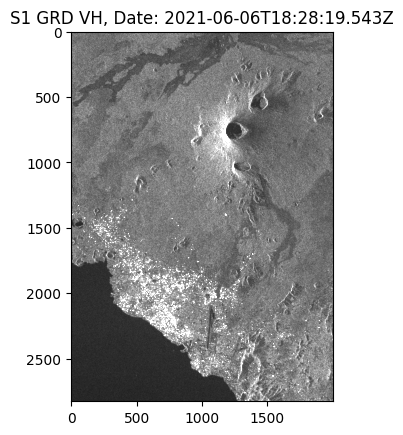

In [11]:
zoomed_results_kv_s1 = {}
for result in sorted_search_results_s1:
    # getting the date of aquisition
    publication_date_str = result.properties.get("publicationDate", "")
    publication_date = datetime.strptime(publication_date_str, '%Y-%m-%dT%H:%M:%S.%fZ')
    date_format = "%Y-%m-%d"
    if datetime.strptime(start_dt, date_format) <= publication_date <= datetime.strptime(end_dt, date_format):
 
        if glob(os.path.join('/tmp', f"S1A_IW_GRDH_1SDV_*{publication_date.strftime('%Y%m%d')}*")):
            s1 = glob(os.path.join('/tmp', f"S1A_IW_GRDH_1SDV_*{publication_date.strftime('%Y%m%d')}*", 'measurement', '*vh*'))[0]
            print(s1)
            with rio.open(s1) as src:
                s1_array = src.read()
                s1_array = np.flip(s1_array, axis=1)
                print(s1_array.shape)
                roi = s1_array[:, 14000:19000, 6000:8000]
            transposed_s1 = np.transpose(roi, (1, 2, 0))
            plt.imshow(transposed_s1, cmap='gray', vmin=0, vmax=255)
            plt.title(f'S1 GRD VH, Date: {publication_date_str}')
            plt.show()
            zoomed_results_kv_s1[result.properties["publicationDate"]] = transposed_s1

In [12]:
zoomed_results_kv_s1.keys()

dict_keys(['2021-05-13T18:13:43.754Z', '2021-05-25T18:44:55.293Z', '2021-05-27T07:16:57.663Z', '2021-06-06T18:28:19.543Z'])

Choosing an image before and after the vulcano event to get the differences

In [13]:
image1 = zoomed_results_kv_s1['2021-05-13T18:13:43.754Z']
image2 = zoomed_results_kv_s1['2021-06-06T18:28:19.543Z']


In [14]:
def plot_sentinel1_difference(before, after, threshold=0):
    """
    Plot the difference between two Sentinel-1 images.
    """
    # Checking that both arrays have the same shape
    min_rows = min(before.shape[0], after.shape[0])
    min_cols = min(before.shape[1], after.shape[1])

    before = before[:min_rows, :min_cols, :]
    after = after[:min_rows, :min_cols, :]
    difference = before - after
    # Apply thresholding to highlight changes
    masked_difference = np.where(difference <= threshold, 0, difference)
    plt.figure(figsize=(20, 15))

    plt.subplot(1, 3, 1)
    plt.imshow(before, cmap='gray', vmin=0, vmax=255)
    plt.title('Before the eruption')

    plt.subplot(1, 3, 2)
    plt.imshow(after, cmap='gray', vmin=0, vmax=255)
    plt.title('After the eruption')

    plt.subplot(1, 3, 3)
    plt.imshow(masked_difference, cmap='coolwarm', vmin=np.nanmin(masked_difference), vmax=np.nanmax(masked_difference))
    plt.title('Difference (After - Before)')
    plt.colorbar(shrink=0.1)

    plt.tight_layout()
    plt.show()

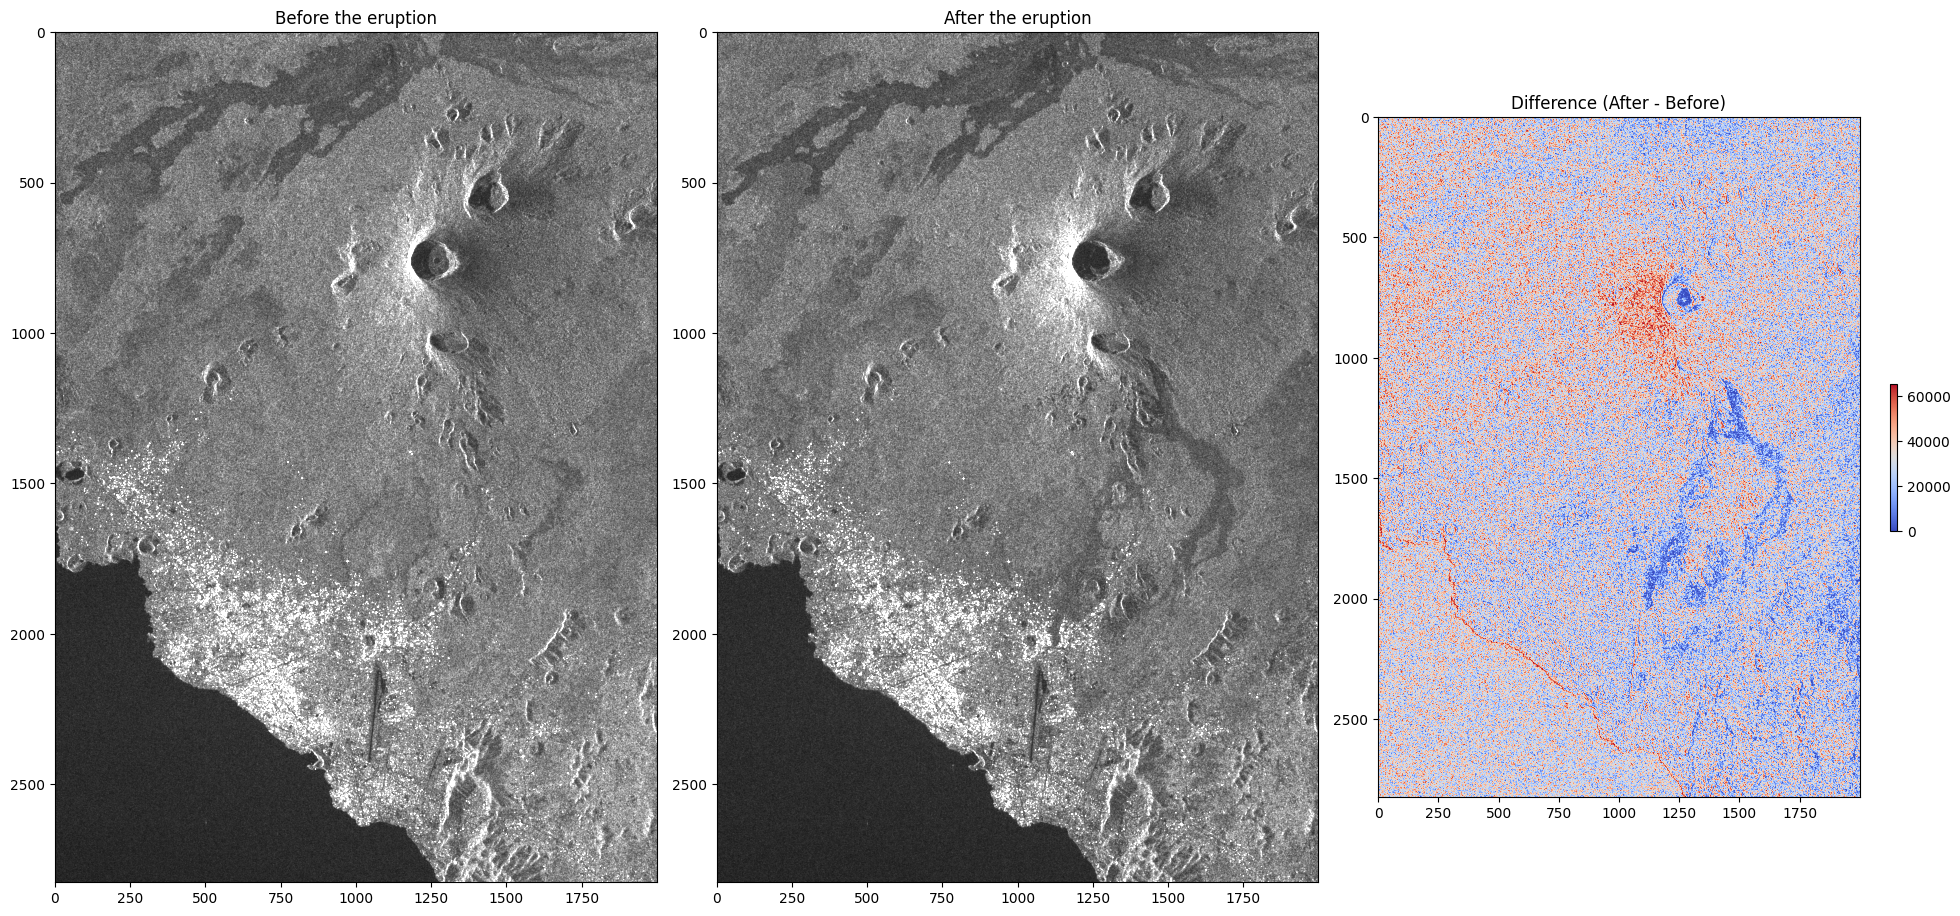

In [15]:
plot_sentinel1_difference(image1, image2, threshold = 0)

In the comparison of the images before and after the volcano eruption, a distinct pattern is evident in the difference image. The blue regions indicate lower values (negative values) after the eruption event. This effect is particularly pronounced in the lava flow area, where the negative values suggest possible removal of vegetation due to the lava. The distinct pattern in the difference S1 VH image provides clear visual evidence of the changes caused by the eruption.


## Monitoring Volcanic Emissions with Sentinel 5p

In [16]:
setup_logging(2)  # 0: nothing, 1: only progress bars, 2: INFO, 3: DEBUG

dag = EODataAccessGateway()
geometry = "POLYGON ((29.132996 -1.709601, 29.132996 -1.424063, 29.270325 -1.424063, 29.270325 -1.709601, 29.132996 -1.709601))"
search_results_s5, total_count = dag.search(
    productType="S5P_L2_SO2",
    geom=geometry,
    start=start_dt,
    end=end_dt,
)

2023-12-14 09:41:25,742 eodag.config                     [INFO    ] Loading user configuration from: /home/eoafrica/.config/eodag/eodag.yml
2023-12-14 09:41:25,906 eodag.core                       [INFO    ] usgs: provider needing auth for search has been pruned because no crendentials could be found
2023-12-14 09:41:25,906 eodag.core                       [INFO    ] aws_eos: provider needing auth for search has been pruned because no crendentials could be found
2023-12-14 09:41:25,907 eodag.core                       [INFO    ] meteoblue: provider needing auth for search has been pruned because no crendentials could be found
2023-12-14 09:41:25,907 eodag.core                       [INFO    ] hydroweb_next: provider needing auth for search has been pruned because no crendentials could be found
2023-12-14 09:41:26,059 eodag.core                       [INFO    ] Locations configuration loaded from /home/eoafrica/.config/eodag/locations.yml
2023-12-14 09:41:26,060 eodag.core              

In [17]:
search_results_s5

SearchResult([EOProduct(id=S5P_NRTI_L2__SO2____20210525T105058_20210525T105558_18728_01_020104_20210525T115445, provider=creodias_s3),
              EOProduct(id=S5P_NRTI_L2__SO2____20210604T110201_20210604T110701_18870_01_020104_20210604T120546, provider=creodias_s3),
              EOProduct(id=S5P_NRTI_L2__SO2____20210503T110303_20210503T110803_18416_01_020104_20210503T120614, provider=creodias_s3),
              EOProduct(id=S5P_NRTI_L2__SO2____20210603T112201_20210603T112701_18856_01_020104_20210603T122246, provider=creodias_s3),
              EOProduct(id=S5P_NRTI_L2__SO2____20210530T105701_20210530T110201_18799_01_020104_20210530T115949, provider=creodias_s3),
              EOProduct(id=S5P_RPRO_L2__SO2____20210507T104752_20210507T122922_18473_03_020401_20230210T232459, provider=creodias_s3),
              EOProduct(id=S5P_RPRO_L2__SO2____20210607T110817_20210607T124946_18913_03_020401_20230213T082552, provider=creodias_s3),
              EOProduct(id=S5P_OFFL_L2__SO2____20210509

In [18]:
sorted_search_results_s5 = sorted(search_results_s5, key=lambda x: datetime.strptime(x.properties.get("publicationDate", ""), '%Y-%m-%dT%H:%M:%S.%fZ'))
sorted_search_results_s5
setup_logging(0) 
dag.download_all(sorted_search_results_s5)

['/tmp/S5P_NRTI_L2__SO2____20210502T112303_20210502T112803_18402_01_020104_20210502T122819',
 '/tmp/S5P_NRTI_L2__SO2____20210507T112803_20210507T113303_18473_01_020104_20210507T123315',
 '/tmp/S5P_NRTI_L2__SO2____20210510T121303_20210510T121803_18516_01_020104_20210510T131545',
 '/tmp/S5P_NRTI_L2__SO2____20210518T112303_20210518T112803_18629_01_020104_20210518T122144',
 '/tmp/S5P_NRTI_L2__SO2____20210526T121058_20210526T121558_18743_01_020104_20210526T131348',
 '/tmp/S5P_NRTI_L2__SO2____20210530T105701_20210530T110201_18799_01_020104_20210530T115949',
 '/tmp/S5P_NRTI_L2__SO2____20210603T112201_20210603T112701_18856_01_020104_20210603T122246',
 '/tmp/S5P_NRTI_L2__SO2____20210606T120701_20210606T121201_18899_01_020104_20210606T130646',
 '/tmp/S5P_RPRO_L2__SO2____20210502T104108_20210502T122238_18402_03_020401_20230210T150537',
 '/tmp/S5P_RPRO_L2__SO2____20210607T110817_20210607T124946_18913_03_020401_20230213T082552',
 '/tmp/S5P_NRTI_L2__SO2____20210503T110303_20210503T110803_18416_01_02

In [19]:
os.listdir('/tmp/S5P_NRTI_L2__SO2____20210525T105058_20210525T105558_18728_01_020104_20210525T115445')

['S5P_NRTI_L2__SO2____20210525T105058_20210525T105558_18728_01_020104_20210525T115445.cdl',
 'S5P_NRTI_L2__SO2____20210525T105058_20210525T105558_18728_01_020104_20210525T115445.nc']

In [27]:

for result in sorted_search_results_s5:
    # getting the date of acquisition
    publication_date_str = result.properties.get("publicationDate", "")
    publication_date = datetime.strptime(publication_date_str, '%Y-%m-%dT%H:%M:%S.%fZ')
    date_format = "%Y-%m-%d"
    
    if datetime.strptime(start_dt, date_format) <= publication_date <= datetime.strptime(end_dt, date_format):
        
        s5_files = glob(os.path.join('/tmp', f"S5P_*{publication_date.strftime('%Y%m%d')}*", "*.nc"))
        
        if s5_files:
            print(publication_date.strftime('%Y%m%d'))
            for s5_file in s5_files:

                print(s5_file)
                s5_file = s5_files[0]  # Assuming only one .nc file per date, adjust if necessary

                # Read the .nc file using xarray
                s5_dataset = xr.open_dataset(s5_file)
                #print(s5_dataset)
                #print(s5_dataset.info())
                #print(s5_dataset.data_vars)
                # Assuming variable name is 'your_variable_name', adjust accordingly
                print(s5_dataset.keys())
                # Assuming s5_dataset is your xarray.Dataset
                attribute_value = s5_dataset.attrs.get('attribute_name', default_value)

                s5_array = s5_dataset['keywords'].values
                
                #s5_array = np.flip(s5_array, axis=1)
                # zooming
                #s5_array = s5_array[:, 13000:19000, 5000:9000]

               # transposed_s5 = np.transpose(s5_array, (1, 2, 0))

                #plt.imshow(transposed_s5, cmap='gray', vmin=0, vmax=255)
                #plt.title(f'S5P Data, Date: {publication_date_str}')
                #plt.show()

                #zoomed_results_kv_s5[result.properties["publicationDate"]] = transposed_s5


20210502
/tmp/S5P_NRTI_L2__SO2____20210502T112303_20210502T112803_18402_01_020104_20210502T122819/S5P_NRTI_L2__SO2____20210502T112303_20210502T112803_18402_01_020104_20210502T122819.nc
KeysView(<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes: (12/59)
    Conventions:                        CF-1.7
    institution:                        DLR-IMF
    source:                             Sentinel 5 precursor, TROPOMI, space-...
    history:                            2021-05-02 12:28:37.954308 f_s5pops u...
    summary:                            TROPOMI/S5P L2 data Swath 5.5x3.5km2 ...
    tracking_id:                        2689c5ca-2b59-4701-8c66-6319ee18c1ee
    ...                                 ...
    Status_CTMFCT_CTMANA:               Nominal
    Status_BG:                          Nominal
    Status_AER_AI:                      Unneeded
    Status_L2__CLOUD_:                  External
    Status_reference_spectrum:          earth
    Status_L2__O3____:    

KeyError: 'keywords'

In [ ]:
publication_date.strftime('%Y%m%d')

In [ ]:
glob(os.path.join('/tmp', f"S5P_*{publication_date.strftime('%Y%m%d')}*", "*.nc"))